# MolPCBA dataset inspection & loading

In [2]:
from ogb.graphproppred import GraphPropPredDataset
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
"""Set protein number"""
PROTEIN_NR = 349519

In [4]:
dataset = GraphPropPredDataset(root= './data/OGBG' ,name = "ogbg-molpcba")

split_idx = dataset.get_idx_split()

graph, _ = dataset[1]

Downloaded 0.04 GB: 100%|██████████| 39/39 [00:08<00:00,  4.51it/s]


Extracting ./data/OGBG/pcba.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 437929/437929 [00:04<00:00, 89764.88it/s]


Saving...


In [5]:
graph_lengths = [graph['num_nodes'] for graph, _ in dataset]
max_length_index = graph_lengths.index(max(graph_lengths))
print(max_length_index)

349519


In [6]:
graph, _ = dataset[PROTEIN_NR]
num_nodes = graph['num_nodes']
num_nodes

332

In [7]:
num_edges = graph['edge_index'].shape[1]
num_edges

672

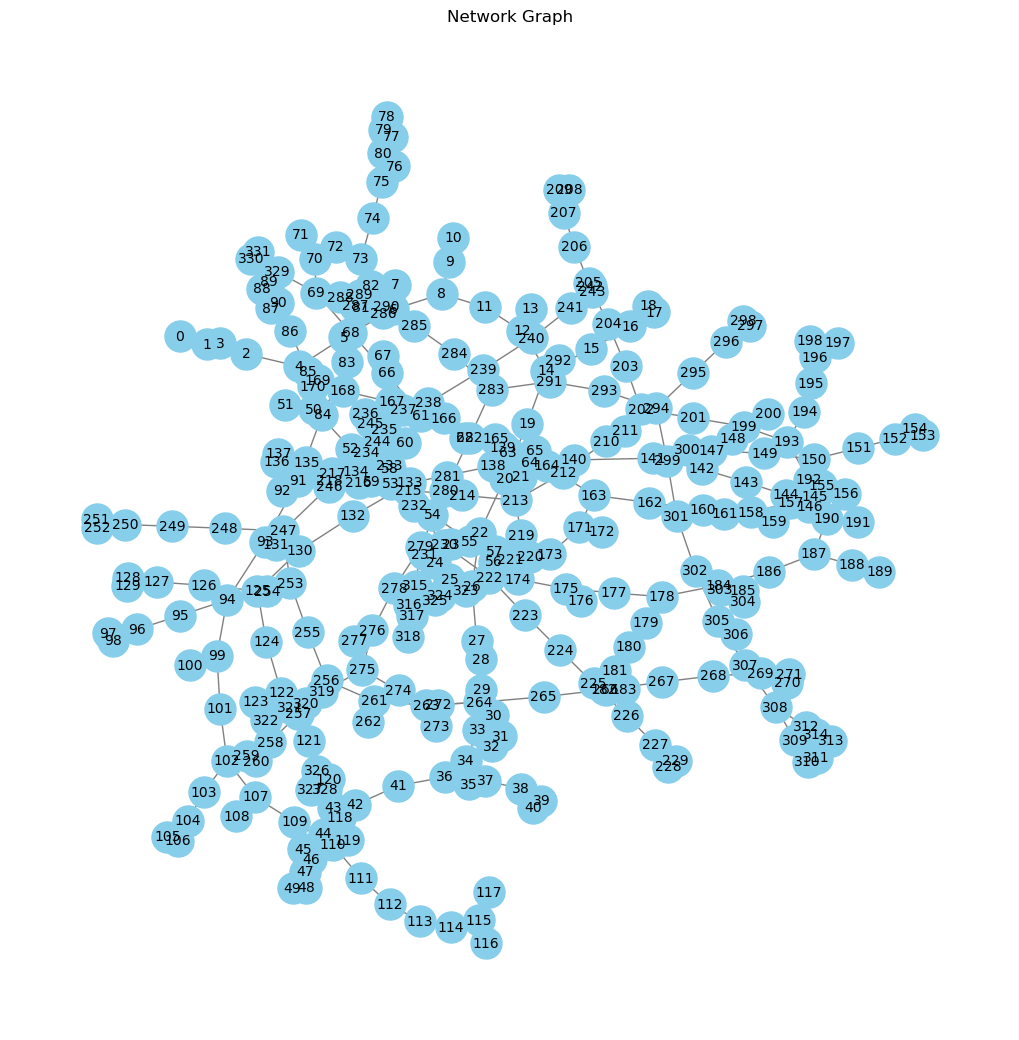

In [8]:
graph_tuple = dataset[PROTEIN_NR]

graph = graph_tuple[0]

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']

G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Network Graph")
plt.show()

In [9]:
import pickle
filename = f"graph_{PROTEIN_NR}_OGBG.pkl"

with open(filename, 'wb') as output:
    pickle.dump(graph, output)